In [165]:
#Problem 1

##############################
#prepare data for PCA analysis
##############################
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



df = pd.read_csv('SP500_close_price.csv')
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']
df = df.fillna(method='ffill') #fills NaN by substituting it with previous entry
dflog = df.apply(np.log)
#compute absolute returns on the log transformed data
daily_return = dflog.diff(periods=1).dropna()
X = daily_return.values #converting dataframe to array

n_samples = X.shape[0]
n_features = X.shape[1]
n_components=min(n_samples, n_features)

In [156]:
d = open('SP500_ticker.csv','r')
df1 = pd.read_csv(d)

k = [i.rstrip() for i in df1['sector']] #removing spaces at end of some words in sector

del df1['sector']
df1 = df1.join(pd.DataFrame({'sector':k}))

for i in range(len(df1['ticker'])):
    if df1['ticker'][i] == 'BF-B':
        df1['ticker'][i] = 'BF.B'
        
for i in range(len(df1['ticker'])):
    if df1['ticker'][i] == 'BRK-B':
        df1['ticker'][i] = 'BRK.B'


In [46]:
#Python
# use sklearn.decomposition.PCA
# sklearn uses covariance matrix. To use correlation matrix, we would do:
Xstd = StandardScaler().fit_transform(X)
pca = PCA(n_components=min(n_samples, n_features))
principalComponents = pca.fit_transform(Xstd)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.columns = ['Principal Component '+str(i+1) for i in range(n_features)]

Question a) 1.


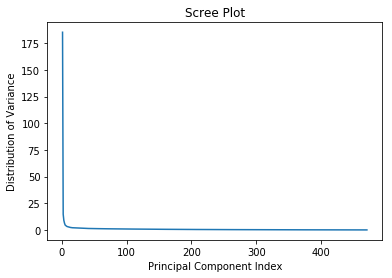

In [5]:
print('Question a) 1.')
variance = pca.explained_variance_
index = [i+1 for i in range(n_components)]
plt.plot(index,variance)
plt.xlabel('Principal Component Index')
plt.ylabel('Distribution of Variance')
plt.title('Scree Plot')
plt.savefig('Scree Plot of Distribution of Variance.png')

Question a) 2.


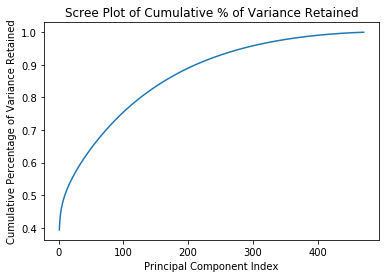

In [6]:
print('Question a) 2.')
precentage_var = pca.explained_variance_ratio_
cum_var = pca.explained_variance_ratio_.cumsum()
plt.plot(index,cum_var)
plt.xlabel('Principal Component Index')
plt.ylabel('Cumulative Percentage of Variance Retained')
plt.title('Scree Plot of Cumulative % of Variance Retained')
plt.savefig('Scree Plot of Cumulative % of Variance Retained.png')

Question a) 3.
Number of principal components that must be retained in order to capture atleast 80% of the total variance in data: 126


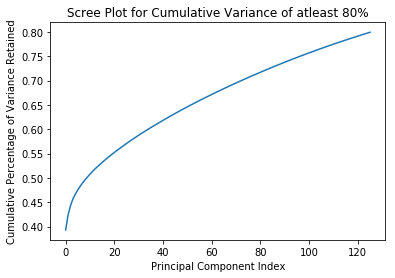

In [157]:
print('Question a) 3.')

cum_var_80 = []
for i in cum_var:
    if i <= 0.8:
        cum_var_80.append(i)
        
index1 = range(len(cum_var_80))
print('Number of principal components that must be retained in order to capture atleast 80% of the total variance in data:',len(cum_var_80))

plt.plot(index1,cum_var_80)
plt.xlabel('Principal Component Index')
plt.ylabel('Cumulative Percentage of Variance Retained')
plt.title('Scree Plot for Cumulative Variance of atleast 80%')
plt.savefig('Scree Plot for Cumulative Variance of atleast 80%.png')

In [158]:
print('Question a) 4.')
sort_per_var = sorted(precentage_var,reverse=True) #sorting %var in descending order

#removing top 2 %variance components
del sort_per_var[0] #removing 1st element
del sort_per_var[0] #removing 2nd element from actual array (removing 1st element from new array)
reconstruction_error = np.sum(sort_per_var) # sum of %var of whats discarded
print('Estimated Reconstruction Error (if top 2 of the PCA components are retained):',reconstruction_error.round(4))

Question a) 4.
Estimated Reconstruction Error (if top 2 of the PCA components are retained): 0.5755


Question b) 1.
Date with lowest value of 1st principal component: 2011-08-09 00:00:00


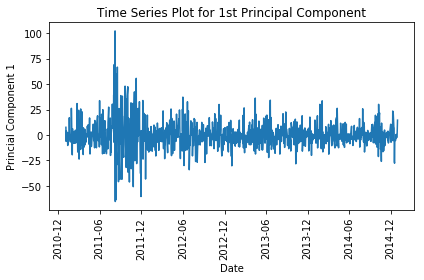

In [197]:
print('Question b) 1.')

principalComponent_1 = principalDf['Principal Component 1']

plt.plot(daily_return.index,principalComponent_1)
plt.xlabel('Date')
plt.ylabel('Princial Component 1')
plt.title('Time Series Plot for 1st Principal Component')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Time Series Plot for 1st Principal Component.png')

#get index of min value of pc1, to find date corresponding to that
index_min_PC1 = principalComponent_1.idxmin()
print('Date with lowest value of 1st principal component:',daily_return.index[index_min_PC1])

In [169]:
print('Question b) 2.')
#extract weights from pca model for 1st and 2nd principal components
Weights_PC1 = pca.components_[0]
Weights_PC2 = pca.components_[1]
print('Weights for 1st principal components:\n',Weights_PC1)
print('\n\nWeights for 2nd principal components:\n',Weights_PC2)

Question b) 2.
Weights for 1st principal components:
 [-0.06148286 -0.05612293 -0.01338367 -0.03142776 -0.04873121 -0.03739019
 -0.05189389 -0.04368021 -0.05903906 -0.05146821 -0.05518395 -0.05411716
 -0.04362366 -0.0379498  -0.05502761 -0.05357572 -0.04042444 -0.05536893
 -0.04513837 -0.03938982 -0.03666691 -0.04441632 -0.04092533 -0.05768976
 -0.05357866 -0.04201156 -0.06338442 -0.04514652 -0.03825544 -0.03280334
 -0.0522285  -0.05389427 -0.05285698 -0.05189078 -0.05046586 -0.02746048
 -0.00855835 -0.05017396 -0.05091829 -0.05338743 -0.04309722 -0.04969014
 -0.0555124  -0.04393453 -0.03207285 -0.04537758 -0.05116935 -0.03199813
 -0.04889843 -0.0251804  -0.05309729 -0.05897595 -0.04608874 -0.04877988
 -0.05732623 -0.04962918 -0.03849037 -0.05048002 -0.06121387 -0.02521246
 -0.02667146 -0.0364229  -0.06182838 -0.04243292 -0.0026297  -0.05293305
 -0.05372974 -0.04229311 -0.03708482 -0.04393482 -0.03557961 -0.04287546
 -0.05175368 -0.03206475 -0.02687835 -0.05160657 -0.03594994 -0.054498

Question b) 3.
                             Weights_PC1
sector                                  
Consumer                       -0.035580
Consumer Discretionary         -0.041449
Consumer Staples               -0.034657
Energy                         -0.046582
Financials                     -0.053653
Health Care                    -0.040472
Industrials                    -0.049450
Information Technology         -0.041540
Materials                      -0.045777
Telecommunications Services    -0.034257
Utilities                      -0.040671


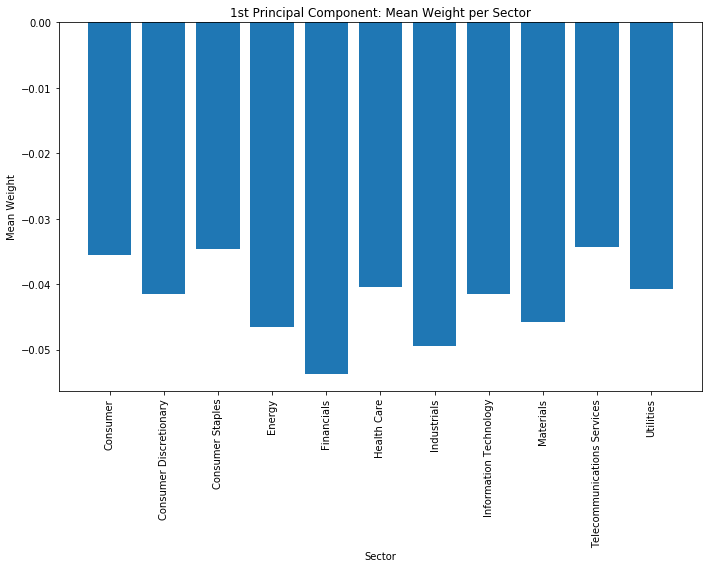

In [196]:
print('Question b) 3.')
#plot for 1st principal component

#weight_PC1 vs features vs sectors  
#groupby sector and find mean value of weights_PC1
#plot mean vs sector bar graph

SECTOR_df1 = pd.DataFrame({'Features':daily_return.columns.values,'Weights_PC1':Weights_PC1})

#appending sector names for each feature in data
sector1=[]
for i in range(len(SECTOR_df1['Features'])):
    for j in range(len(df1['ticker'])):
        if SECTOR_df1['Features'][i]==df1['ticker'][j]:
            sector1.append(df1['sector'][j])

SECTOR_df1 = SECTOR_df1.join(pd.DataFrame({'sector':sector1}))

#grouped by mean weight per sector
grouped1 = SECTOR_df1.groupby(['sector'])['Weights_PC1'].mean()
grouped_PC1 = pd.DataFrame(grouped1)

print(grouped_PC1)

plt.figure(figsize=(10,8))
plt.bar(grouped_PC1.index,grouped_PC1['Weights_PC1'])
plt.xlabel("Sector")
plt.ylabel("Mean Weight") 
plt.title('1st Principal Component: Mean Weight per Sector')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('1st PC Mean Weight per Sector.png')

Question b) 4.
                             Weights_PC2
sector                                  
Consumer                        0.046778
Consumer Discretionary         -0.006975
Consumer Staples                0.045294
Energy                         -0.037365
Financials                      0.004987
Health Care                     0.008405
Industrials                    -0.014528
Information Technology         -0.032975
Materials                      -0.024872
Telecommunications Services     0.034539
Utilities                       0.111650


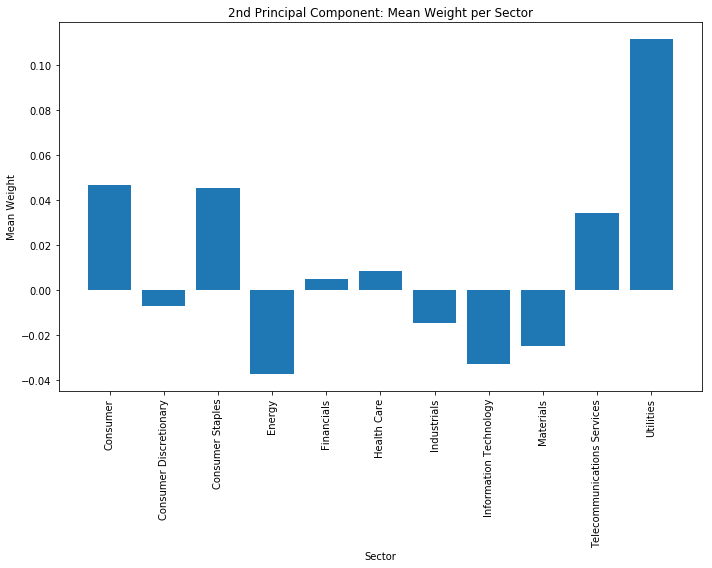

In [195]:
print('Question b) 4.')
#plot for 2nd principal component

SECTOR_df2 = pd.DataFrame({'Features':daily_return.columns.values,'Weights_PC2':Weights_PC2})

#appending sector names for each feature in data
sector2=[]
for i in range(len(SECTOR_df2['Features'])):
    for j in range(len(df1['ticker'])):
        if SECTOR_df2['Features'][i]==df1['ticker'][j]:
            sector2.append(df1['sector'][j])

SECTOR_df2 = SECTOR_df2.join(pd.DataFrame({'sector':sector2}))

#grouped by mean weight per sector
grouped2 = SECTOR_df2.groupby(['sector'])['Weights_PC2'].mean()
grouped_PC2 = pd.DataFrame(grouped2)

print(grouped_PC2)

plt.figure(figsize=(10,8))
plt.bar(grouped_PC2.index,grouped_PC2['Weights_PC2'])
plt.xlabel("Sector")
plt.ylabel("Mean Weight") 
plt.title('2nd Principal Component: Mean Weight per Sector')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('2nd PC Mean Weight per Sector.png')

## Problem 2

In [194]:
print('Question b)')
def filter_features_by_cor(df):
    CORR = []
    n,m = df.shape
    X = df.iloc[:,:m-1] # input data
    Y = df.iloc[:,m-1] # output data
    for i in range(len(df.columns)-1):
        cor = df[df.columns[i]].corr(df[df.columns[-1]])
        CORR.append(cor)
        
        Out_df = pd.DataFrame({'Features':df.columns.values[0:m-1]})
        Out_df = Out_df.join(pd.DataFrame({'Correlation':CORR}))
    return Out_df

df2 = pd.read_csv('BMI.csv')
BMI_df = filter_features_by_cor(df2)

#select top 3 features which have maximum correlation with output
sorted_BMI_df = BMI_df.sort_values('Correlation',ascending=False)
print('Top 3 features of BMI data with respect to correlation matrix are: {}, {}, {}'.format(sorted_BMI_df['Features'][0],sorted_BMI_df['Features'][1],sorted_BMI_df['Features'][2]))

Question b)
Top 3 features of BMI data with respect to correlation matrix are: Age, Weight, Height


In [189]:
print('Question c)')
#Univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

n,m = df2.shape
X = df2.iloc[:,:m-1] # get training input data
Y = df2.iloc[:,m-1] # get train output data

X_NEW = []
for i in range(1,4):
    X_new = SelectKBest(score_func=f_regression, k= i).fit_transform(X, Y)
    X_NEW.append(X_new)
    
print('New feature set for size 1 is: \n',X_NEW[0])
print('\n\nNew feature set for size 2 is: \n',X_NEW[0])
print('\n\nNew feature set for size 3 is: \n',X_NEW[0])

Question c)
New feature set for size 1 is: 
 [[ 87.9]
 [ 83. ]
 [ 85.2]
 [ 77.1]
 [ 85.3]
 [ 88.6]
 [ 81.9]
 [100. ]
 [ 94.4]
 [ 99.1]
 [ 76.5]
 [ 88.5]
 [ 82.5]
 [100.5]
 [ 77.6]
 [ 83.6]
 [ 90.7]
 [ 86.4]
 [106.8]
 [102.9]
 [ 73.9]
 [ 72.8]
 [ 88.2]
 [ 79.7]
 [ 79.1]
 [100.1]
 [ 90.9]
 [ 76.3]
 [ 83.5]
 [ 95.9]
 [ 90.8]
 [ 89.6]
 [ 98.8]
 [105. ]
 [ 84.5]
 [ 83.5]
 [ 76.6]
 [101.8]
 [ 76.4]
 [ 88.7]
 [ 81.2]
 [ 92.4]
 [ 80. ]
 [ 88.7]
 [ 91.6]
 [ 97.5]
 [ 92.1]
 [ 95.6]
 [100.5]
 [ 74.6]
 [ 83.4]
 [ 96.4]
 [106. ]
 [ 75. ]
 [ 81.9]
 [ 90.4]
 [ 90.8]
 [ 92.8]
 [ 90.3]
 [ 96.4]
 [ 95.1]
 [100.4]
 [115.9]
 [ 90.3]
 [108.8]
 [ 79.4]
 [ 83.2]
 [110.3]
 [ 91.6]
 [ 92.7]
 [ 76. ]
 [ 79.5]
 [ 86.1]
 [104.6]
 [104.5]
 [ 69.4]
 [ 73.7]
 [ 77.9]
 [ 83.6]
 [ 83.3]
 [ 86.8]
 [ 86.6]
 [ 90.3]
 [ 88.5]
 [ 93. ]
 [ 83.7]
 [ 92.3]
 [ 90.4]
 [ 93.1]
 [ 92.4]
 [ 93.5]
 [100.9]
 [ 80.6]
 [ 87.2]
 [ 89.2]
 [101.2]
 [ 98. ]
 [104.3]
 [ 98.9]
 [100.5]
 [109.3]
 [115.6]
 [ 77.6]
 [ 85.6]
 [ 86. ]
 [ 89.7]
 

In [193]:
print('Question d)')
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#loop for n_features_to_select from 1 to total no.of features to select best model

n,m = df2.shape
X = df2.iloc[:,:m-1] # get training input data
Y = df2.iloc[:,m-1] # get train output data

score = []
for i in range(1,m+1):
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select = i, step=1)
    selector = selector.fit(X, Y)
    score.append(selector.score(X,Y))

no_of_features = np.argmax(score)+1 #index of value with max score (+1 because indexing starts from 0)

print('The variables that are included in the best model are:\n',df2.columns[:no_of_features].values)

Question d)
The variables that are included in the best model are:
 ['Age' 'Weight' 'Height' 'Neck' 'Chest' 'Abdomen' 'Hip' 'Thigh' 'Knee'
 'Ankle' 'Biceps' 'Forearm' 'Wrist']


13